<a href="https://colab.research.google.com/github/ivybrundege/academic-rag/blob/main/GWC_CNNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
from sklearn import datasets
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# GWC@VT: Convolutional Neural Networks

## Explore our Data
Today, we'll be using the MNIST dataset, which contains a series of handwritten digit images we're gonna try to identify.

This dataset can be loaded straight from Keras.

In [26]:
digits = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = digits.load_data()

Looking more closely at the images:


*   The features describe a grayscale image.
*   The label here is a classification- 1-9




For example, let's visualize one of the numbers in our training set!

<Axes: >

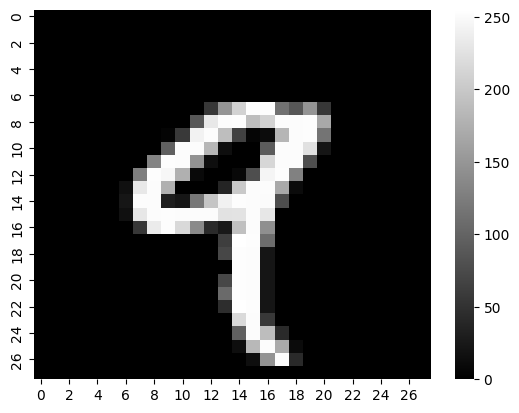

In [12]:
sns.heatmap(X_train[4], cmap = 'gray')

In [13]:
y_train[4]

9

## Prepare Data
Now, let's get the data ready into a form that will work with our model

In [27]:
#1. Normalize.
X_record = X_test #saving for later to observe.
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#2. Reshape.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

What does reshaping mean?

We need to supply our input to our model in a specific format, where we provide it four things: number of examples (images), image dimensions (x and y), and the number of color channels.


*   Number of examples: just the size of X train
*   X dimension: 28
*   Y dimension: 28
*   Color channels: 1 (grayscale)





## Make our model!
Now, let's actually make the model. Again, we'll be using Keras. Unlike in a normal neural network where we just supply dense layers for the hidden layers, we'll be using some convolutional layers as well as some pooling layers.

In [18]:
#1. Create our object
model = keras.Sequential()

#2. First layer: input
input = keras.layers.Input(shape = (28, 28, 1)) #??
model.add(input) #add layer to model

#3. For our first hidden layer, let's do a convolutional layer
c1 = keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')
model.add(c1)
#option-- add batchnorm here.

#4. continue some more convolutional layers
c2 = keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')
model.add(c2)

c3 = keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')
model.add(c3)

#5. Let's also add our pooling layer!
pool = keras.layers.GlobalAveragePooling2D()
model.add(pool)

#examine our resulting model.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,672 (362.00 KB)

 Trainable params: 92,672 (362.00 KB)

 Non-trainable params: 0 (0.00 B)

We also need to create an optimization function and loss function that our model will use during the training process. We can define these when we make the model, or we can make our own.

In [19]:
optimize = keras.optimizers.Adam(learning_rate = 0.001)
loss = keras.losses.SparseCategoricalCrossentropy()

Now, let's compile our model! This is where we combine all of these components we just created

In [20]:
model.compile(optimizer=optimize, loss=loss, metrics=['accuracy'])

## Train our Model
Now it's time to train!

In [21]:
num_epochs = 1
#this dataset is HUGE, as are the number of parameters.
#Run with more epochs at your own risk :)

In [22]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.2)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 322s 214ms/step - accuracy: 0.1152 - loss: 2.3161 - val_accuracy: 0.1583 - val_loss: 2.2210


## Evaluate our Model!
Let's see how our model performed so far.

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.1771 - loss: 2.2246
Loss: 2.2262942790985107
Accuracy: 0.16200000047683716


We can also observe our model in action!

A *logit* is a vector output for a classification problem. It basically says how likely an image is to fall into any given category. For example, since our categories here are [0,9], we'll get an output vector with ten items. The first value tells us how likely the model thinks that the image is a 0, the second for a 1, and so on.

In [31]:
#let's retrieve the logits for the test
logits = model.predict(X_test)

#now, we can use argmax to get the highest value for each. this corresponds with the category the model chose
predictions = logits.argmax(axis = 1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step


0


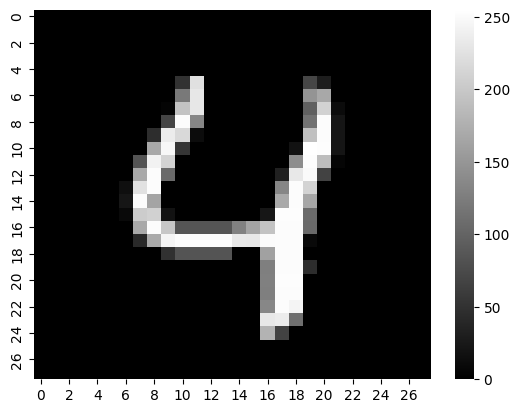

In [32]:
#let's compare!
sns.heatmap(X_record[4], cmap = 'gray')
print(predictions[4])